# Deep Neural Network on the MNIST Dataset



Below is a complete implementation of a deep neural network using TensorFlow and Keras to classify handwritten digits from the MNIST dataset. The model consists of an input layer, three hidden layers with ReLU activation, and an output layer with softmax activation. We also implement early stopping to prevent overfitting.

We are using the following libraries:

In [64]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

First we load the MNIST dataset using TensorFlow's built-in function. The dataset is split into training, validation, and test sets, consisting of 55,000, 5,000, and 10,000 images respectively. Each image is a 28x28 grayscale image representing a handwritten digit (0-9).

In [65]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist.load_data()

# Unpack the dataset
(X_train_full, y_train_full), (X_test, y_test) = mnist

# Split training set into training and validation sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

An example instance of the dataset is displayed below. There we see that the image is represented as a 2D array of pixel values ranging from 0 to 255, and the corresponding label indicates the digit depicted in the image.

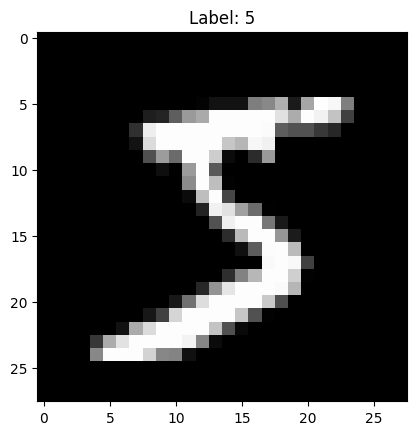

In [66]:
# Display the first image in the training set
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

We will flatten the 28x28 images into 784-dimensional vectors and scale the pixel values to the range [0, 1] for better training performance. This is due to the fact that neural networks generally perform better with normalized input data as they use gradient descent.

In [67]:
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_valid = X_valid.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

Finally, we are ready to define the model architecture. Below we build a deep neural network with three hidden layers, each containing 64 neurons and using the ReLU activation function. The output layer has 10 neurons (one for each digit) with softmax activation to produce probability distributions over the classes.

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(28*28,)),
    tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Next, we define the nadam optimizer with a learning rate of 0.001, compile the model with sparse categorical cross-entropy loss (suitable for integer labels), and accuracy as the evaluation metric.

In [69]:
nadam_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

model.compile(
    optimizer=nadam_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Then we implement early stopping to monitor the validation loss during training. If the validation loss does not improve for 5 consecutive epochs, training will be stopped to prevent overfitting. We also set the model to restore the best weights observed during training.

In [70]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

Finally, we fit the model to the training data for a maximum of 50 epochs, using a batch size of 32. The validation set is used to monitor performance during training and allow for early stopping.

In [71]:
model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32, # Should be the default value, but set explicitly for clarity
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9195 - loss: 0.2688 - val_accuracy: 0.9646 - val_loss: 0.1220
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9611 - loss: 0.1272 - val_accuracy: 0.9710 - val_loss: 0.1025
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9724 - loss: 0.0914 - val_accuracy: 0.9718 - val_loss: 0.0975
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9792 - loss: 0.0683 - val_accuracy: 0.9744 - val_loss: 0.0924
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9835 - loss: 0.0538 - val_accuracy: 0.9740 - val_loss: 0.1038
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9863 - loss: 0.0446 - val_accuracy: 0.9742 - val_loss: 0.1045
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.9754 - val_loss: 0.1028
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9888 -

By looking at the `history` object, we can analyze the training and validation accuracy and loss over epochs to assess the model's performance and check for overfitting.

We see that the model quickly reaches high accuracy on the training set, while the validation accuracy plateaus, indicating that the model is generalizing well without overfitting.

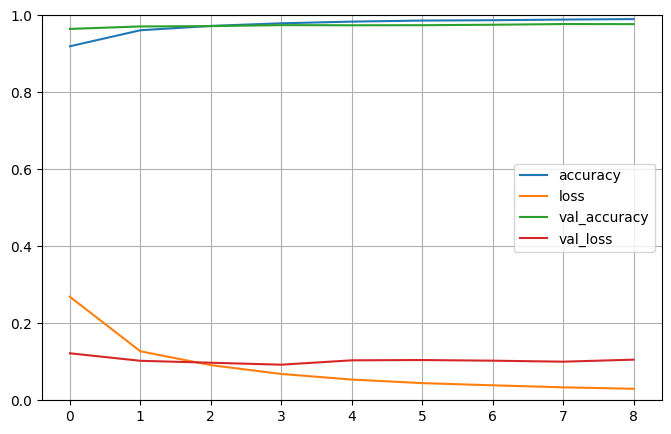

In [ ]:
history = model.history.history

pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Now that we have the trained model, we can evaluate its performance on the test set to see how well it generalizes to unseen data.

In [74]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9697 - loss: 0.0970
Test accuracy: 0.9697


Our model has reached a test accuracy of approximately 97%, indicating that it performs very well on the MNIST digit classification task.